In [2]:
import numpy as np 
import nibabel as nib 
from pathlib import Path
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm



In [3]:
root = Path('Task02_Heart/imagesTr')
label = Path('Task02_Heart/labelsTr')



In [4]:
def change_img_to_label_path(path):
    parts = list(path.parts)
    parts[parts.index('imagesTr')] = "labelsTr"
    return Path(*parts)


In [8]:
sample_path = list(root.glob("la*"))[1]
sample_path_label = change_img_to_label_path(sample_path)

In [9]:
sample_path

WindowsPath('Task02_Heart/imagesTr/la_004.nii.gz')

In [10]:
sample_path_label

WindowsPath('Task02_Heart/labelsTr/la_004.nii.gz')

In [12]:
data = nib.load(sample_path)
label = nib.load(sample_path_label)

mri = data.get_fdata()
mask = label.get_fdata().astype(np.uint8)


In [16]:
len(mri),len(mask)

(320, 320)

This information is available without the need to load anything of the main image data into the memory. Of course there is also access to the image data as a NumPy array

data = img.get_fdata()
data.shape
(128, 96, 24, 2)
type(data)
<... 'numpy.ndarray'>

In [13]:
nib.aff2axcodes(data.affine)

('R', 'A', 'S')

In [23]:
from celluloid import Camera
from IPython.display import display, HTML

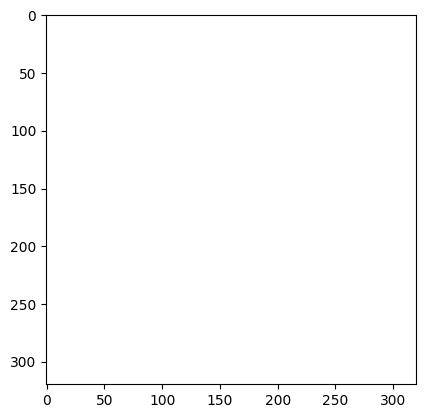

In [28]:
fig = plt.figure()
camera = Camera(fig)
for i in range(mri.shape[2]):
    plt.imshow(mri[:,:,i], cmap='bone')
    mask_ = np.ma.masked_where(mask[:,:,i]==0 ,mask[:,:,i])
    plt.imshow(mask_, alpha= 0.5)
    camera.snap()
animation = camera.animate()




In [27]:
HTML(animation.to_html5_video())